# Déterminer si une personne va couler ou non

In [92]:
import matplotlib
print(matplotlib.__version__)

3.7.2


In [93]:
# Commençons par faire les imports nécessaire
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [94]:
# Récupérer les données
df_titanic = pd.read_csv('Titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploration des données

In [95]:
# Exploration des données
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


On observe qu'il y a 5 objets ainsi que trois catégories avec des valeures nulles (Age, Cabin, Fare)

In [96]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabine a 687 valeures nulles et 204 non-nulles donc cabine peut être éliminée

In [122]:
df_titanic["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

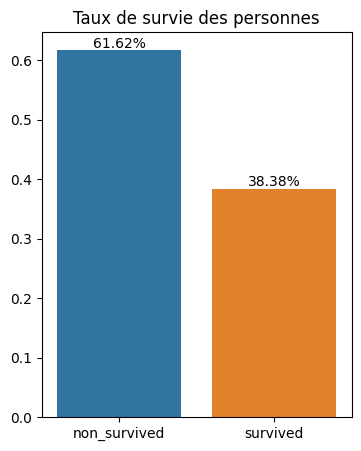

In [128]:
# Affichons les survivants 
survived = df_titanic['Survived'].value_counts()
stat_survive = {}
stat_survive["non_survived"] = survived[0] / (survived[0] + survived[1])
stat_survive["survived"] = survived[1] / (survived[0] + survived[1])
fig, ax = plt.subplots(figsize=(4, 5))
sns.barplot(x=list(stat_survive.keys()), y=list(stat_survive.values()))
ax.set(title="Taux de survie des personnes")
for i, v in enumerate(list(stat_survive.values())):
    ax.annotate(f"{v * 100:.2f}%", (i, v), ha='center', va='bottom', fontsize=10)

On voit que moins de la moitié des passagers a survécu.

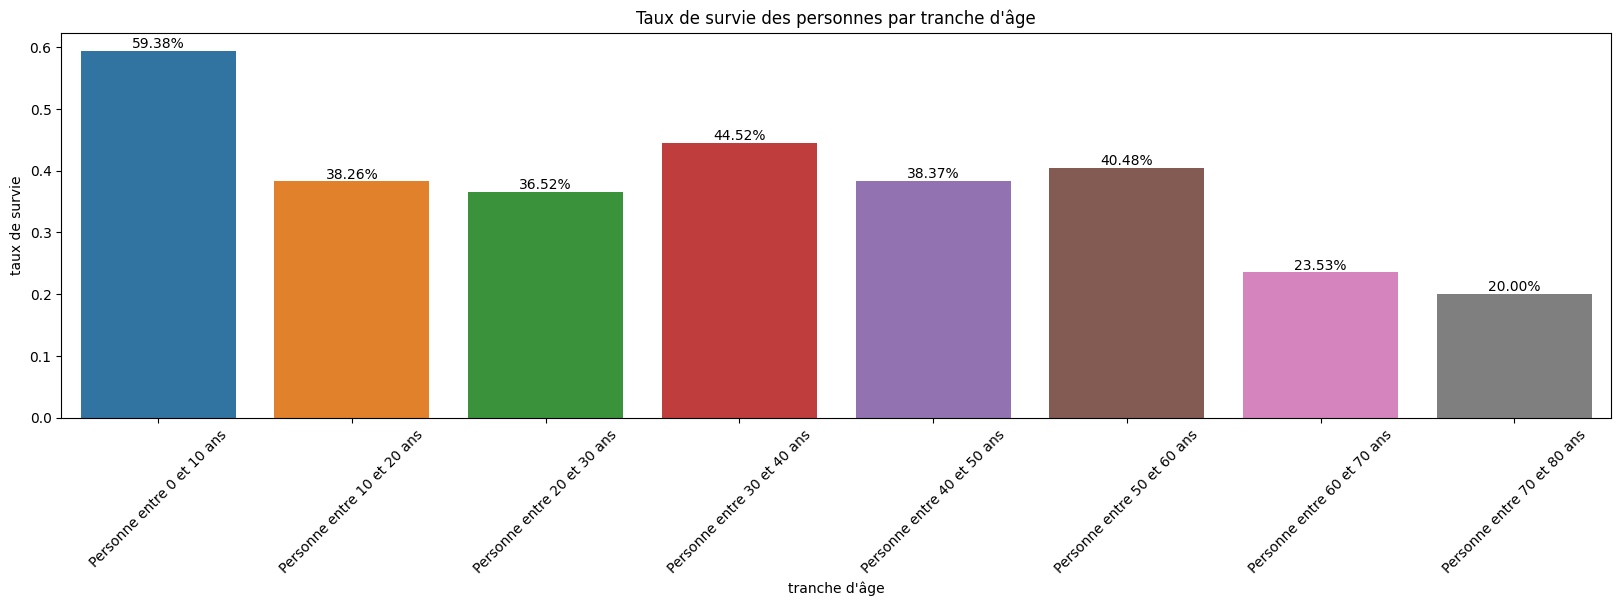

In [98]:
# Affichons les survivants en fonction de l'âge
age_survived = pd.crosstab(df_titanic.Age, df_titanic.Survived)
age_survived.columns = ["non_survived", "survived"]
stat_survive_age = {}
for i in range(10, 81, 10):
    stat_survive_age[f"Personne entre {i -10} et {i} ans"] = age_survived[(age_survived.index <= i) & (age_survived.index > i - 10)]["survived"].sum() / (age_survived[(age_survived.index <= i) & (age_survived.index > i - 10)]['survived'].sum() + age_survived[(age_survived.index <= i) & (age_survived.index > i - 10)]['non_survived'].sum())
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x=list(stat_survive_age.keys()), y=list(stat_survive_age.values()))
ax.set_xticklabels(list(stat_survive_age.keys()), rotation = 45)
ax.set(title="Taux de survie des personnes par tranche d'âge",
       xlabel="tranche d'âge",
       ylabel="taux de survie")
for i, v in enumerate(list(stat_survive_age.values())):
    ax.annotate(f"{v * 100:.2f}%", (i, v), ha='center', va='bottom', fontsize=10)



On peut remarquer qu'il existe trois groupes avec des taux de survies semblables, les enfants en bas âges dont le taux de survie est de 59 %, les 10-60 ans dont le taux de survie varie de 37 à 45 % et les personnes de plus de 60 ans dont le taux de survie varie entre 20 à 24 %.

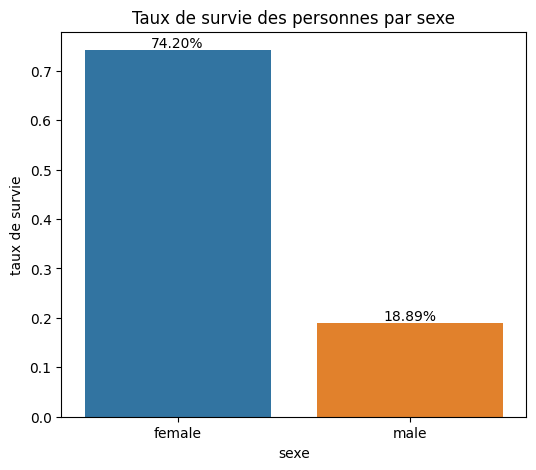

In [126]:
# Affichons les survivants en fonction du sexe
sexe_survived = pd.crosstab(df_titanic.Sex, df_titanic.Survived)
sexe_survived.columns = ["non_survived", "survived"]
stat_survive_sexe = {}
for i in range(0, 2):
    stat_survive_sexe[sexe_survived.index[i]] = sexe_survived[sexe_survived.index == sexe_survived.index[i]]["survived"].sum() / (sexe_survived[sexe_survived.index == sexe_survived.index[i]]["survived"].sum() + sexe_survived[sexe_survived.index == sexe_survived.index[i]]['non_survived'].sum())
fig, ax = plt.subplots(figsize=(6, 5))
sns.barplot(x=list(stat_survive_sexe.keys()), y=list(stat_survive_sexe.values()))
ax.set(title="Taux de survie des personnes par sexe",
       xlabel="sexe",
       ylabel="taux de survie")
for i, v in enumerate(list(stat_survive_sexe.values())):
    ax.annotate(f"{v * 100:.2f}%", (i, v), ha='center', va='bottom', fontsize=10)

Les femmes ont un taux de survie bien supérieur à celui des hommes presque 4 fois plus élevé.

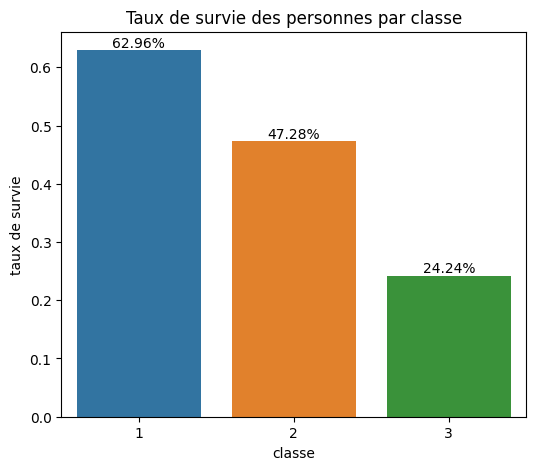

In [127]:
# Affichons les survivants en fonction de la classe
Class_survived = pd.crosstab(df_titanic.Pclass, df_titanic.Survived)
Class_survived.columns = ["non_survived", "survived"]
stat_survive_class = {}
for i in range(3):
    stat_survive_class[Class_survived.index[i]] = Class_survived[Class_survived.index == i + 1]["survived"].sum() / (Class_survived[Class_survived.index == i + 1]["survived"].sum() + Class_survived[Class_survived.index == i + 1]['non_survived'].sum())
fig, ax = plt.subplots(figsize=(6, 5))
sns.barplot(x=list(stat_survive_class.keys()), y=list(stat_survive_class.values()))
ax.set(title="Taux de survie des personnes par classe",
       xlabel="classe",
       ylabel="taux de survie")
for i, v in enumerate(list(stat_survive_class.values())):
    ax.annotate(f"{v * 100:.2f}%", (i, v), ha='center', va='bottom', fontsize=10)

In [129]:
# Faisons deux classes hommes et femmes
df_titanic_femmes = df_titanic[df_titanic.Sex == 'female']
df_titanic_hommes = df_titanic[df_titanic.Sex == 'male']

In [137]:
df_titanic_femmes.Age.max()

63.0

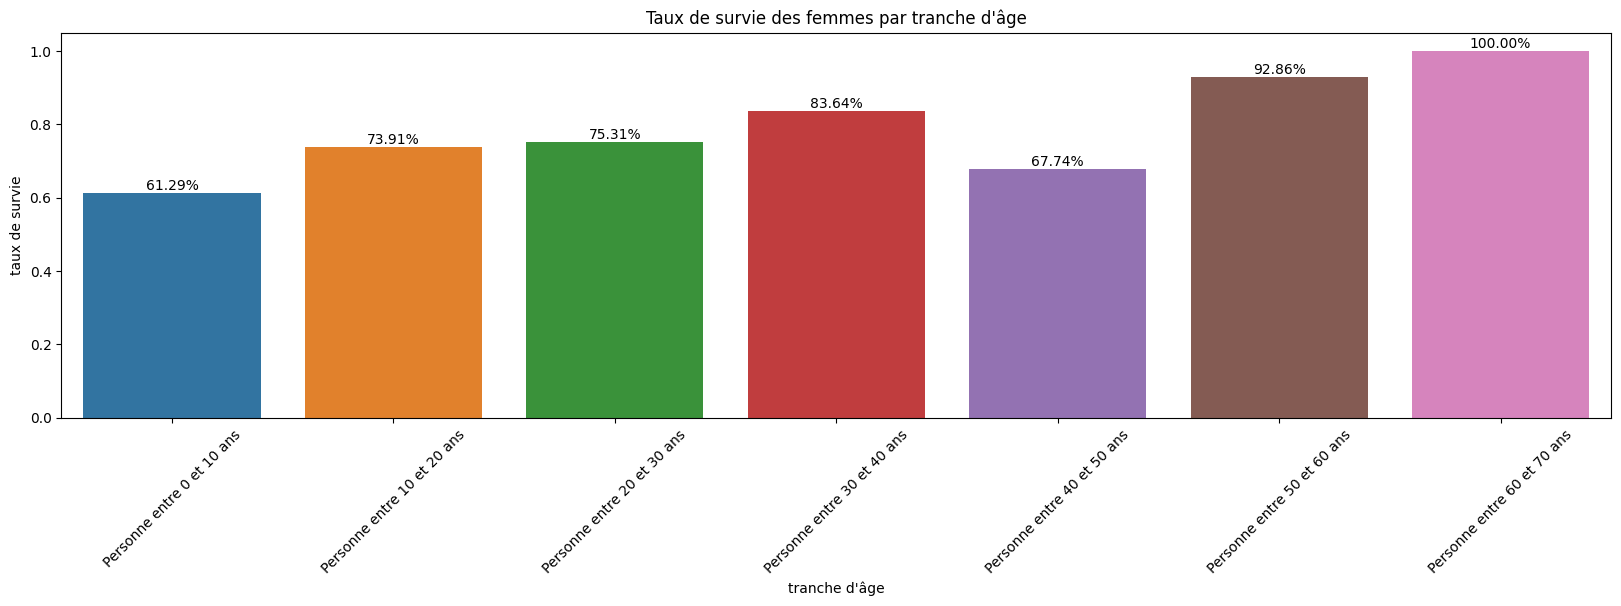

In [141]:
# Et regardons à nouveau les taux de survies par âge
age_survived = pd.crosstab(df_titanic_femmes.Age, df_titanic.Survived)
age_survived.columns = ["non_survived", "survived"]
stat_survive_age = {}
for i in range(10, 71, 10):
    stat_survive_age[f"Personne entre {i -10} et {i} ans"] = age_survived[(age_survived.index <= i) & (age_survived.index > i - 10)]["survived"].sum() / (age_survived[(age_survived.index <= i) & (age_survived.index > i - 10)]['survived'].sum() + age_survived[(age_survived.index <= i) & (age_survived.index > i - 10)]['non_survived'].sum())
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x=list(stat_survive_age.keys()), y=list(stat_survive_age.values()))
ax.set_xticklabels(list(stat_survive_age.keys()), rotation = 45)
ax.set(title="Taux de survie des femmes par tranche d'âge",
       xlabel="tranche d'âge",
       ylabel="taux de survie")
for i, v in enumerate(list(stat_survive_age.values())):
    ax.annotate(f"{v * 100:.2f}%", (i, v), ha='center', va='bottom', fontsize=10)

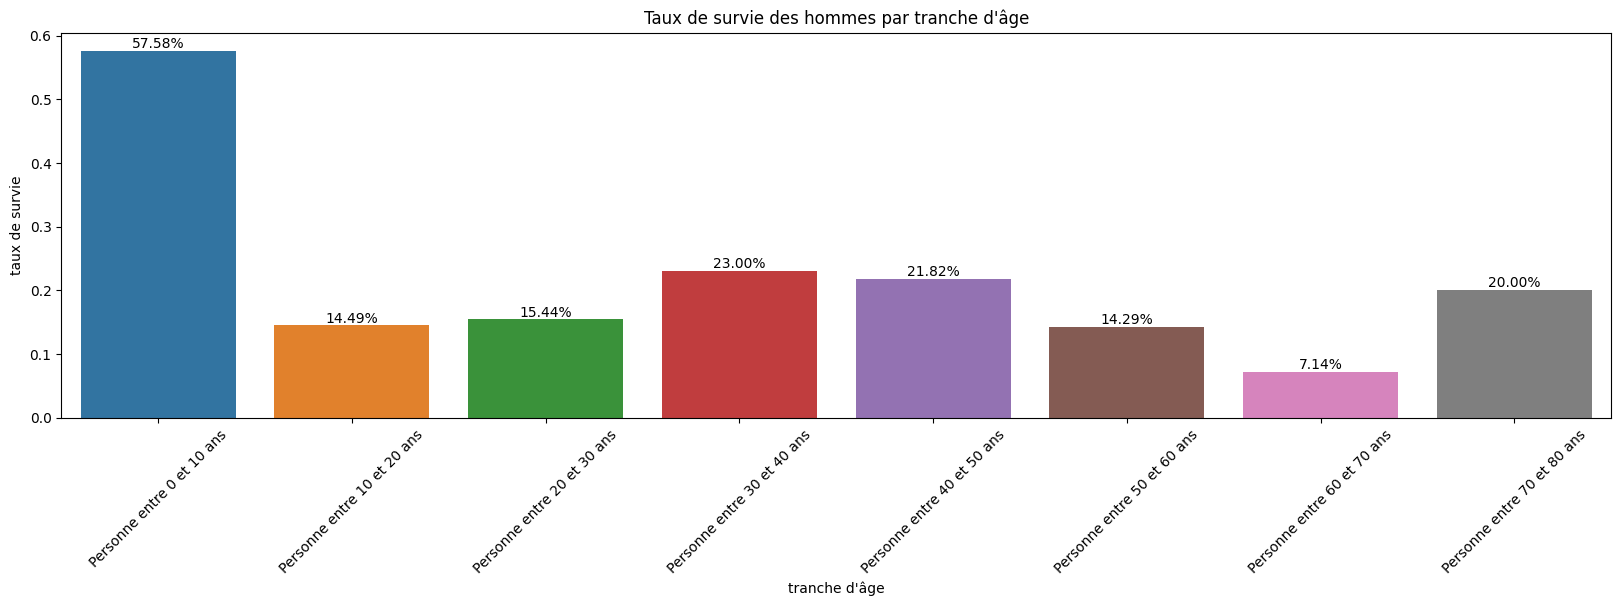

In [145]:
# Maintenant pour les hommes
age_survived = pd.crosstab(df_titanic_hommes.Age, df_titanic.Survived)
age_survived.columns = ["non_survived", "survived"]
stat_survive_age = {}
for i in range(10, 81, 10):
    stat_survive_age[f"Personne entre {i -10} et {i} ans"] = age_survived[(age_survived.index <= i) & (age_survived.index > i - 10)]["survived"].sum() / (age_survived[(age_survived.index <= i) & (age_survived.index > i - 10)]['survived'].sum() + age_survived[(age_survived.index <= i) & (age_survived.index > i - 10)]['non_survived'].sum())
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x=list(stat_survive_age.keys()), y=list(stat_survive_age.values()))
ax.set_xticklabels(list(stat_survive_age.keys()), rotation = 45)
ax.set(title="Taux de survie des hommes par tranche d'âge",
       xlabel="tranche d'âge",
       ylabel="taux de survie")
for i, v in enumerate(list(stat_survive_age.values())):
    ax.annotate(f"{v * 100:.2f}%", (i, v), ha='center', va='bottom', fontsize=10)